# BodyFat_Prediction

## Context
- This notebook shows the workflow to buiding a model for the percentage of body fat estimates from underwater weighing and various body circumference measurements for 252 men.

## Data source
- Source: Kaggle
- This dataset comprises of 14 features, excluding the target. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.
https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset?resource=download
*Note - the data does not require cleaning

## Conclusion
- *The SVM model with standard scalar transform gave a near accurate result*

In [33]:
# Importing the required library
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import svm

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
ler = LabelEncoder()
sc = StandardScaler()

%matplotlib inline

### Visualizing the dataset

In [34]:
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Distribution plots for Density feature is shown below:


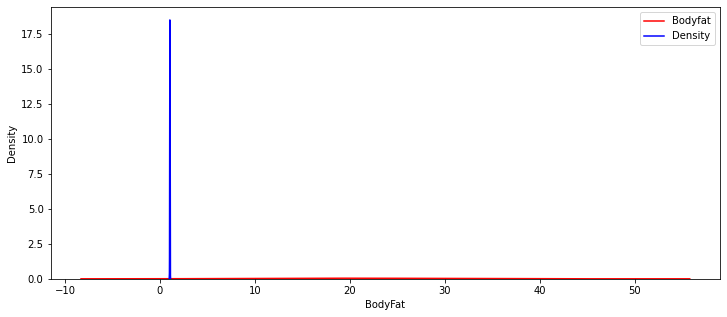

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature is shown below:


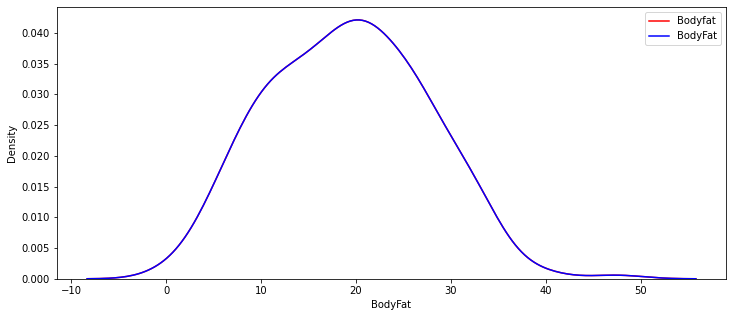

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature is shown below:


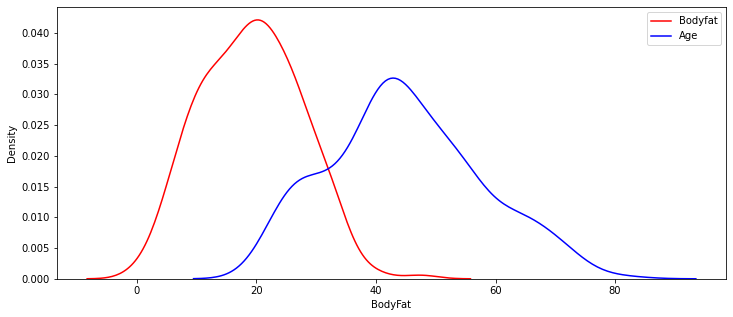

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is shown below:


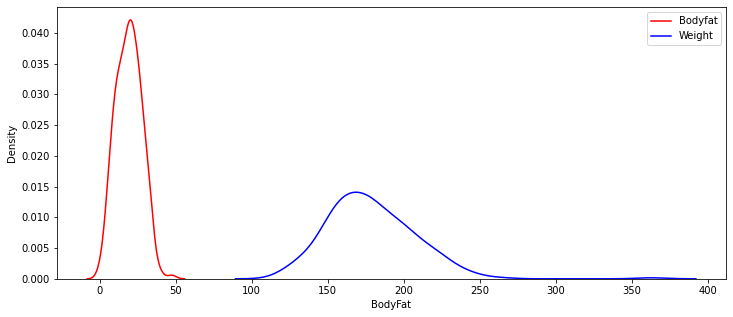

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature is shown below:


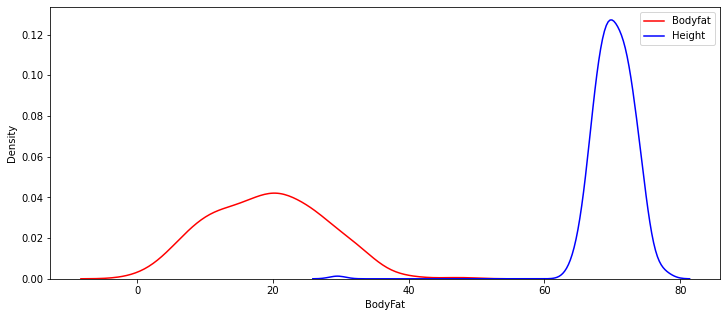

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature is shown below:


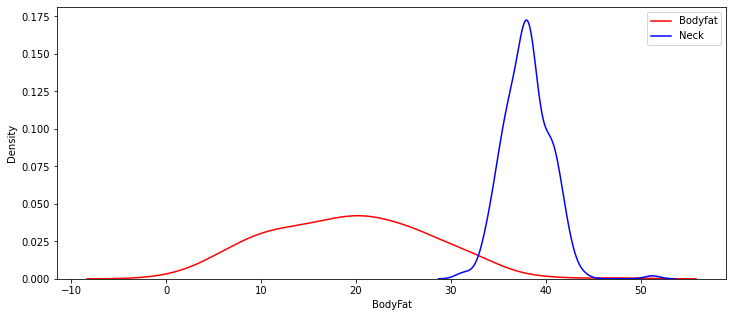

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is shown below:


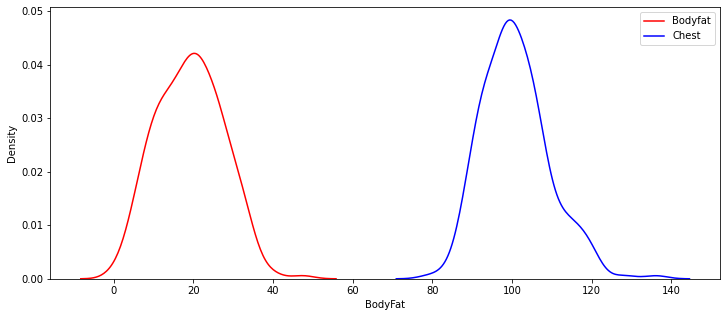

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is shown below:


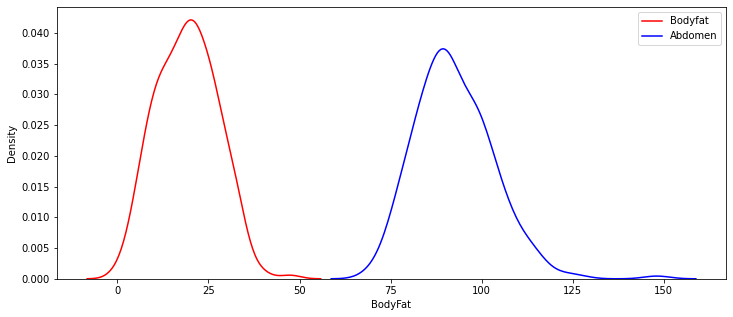

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is shown below:


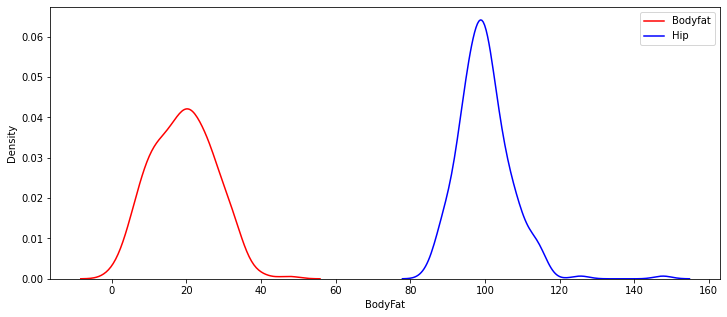

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature is shown below:


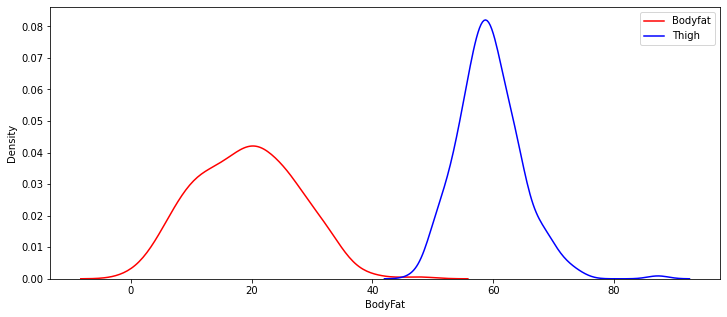

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature is shown below:


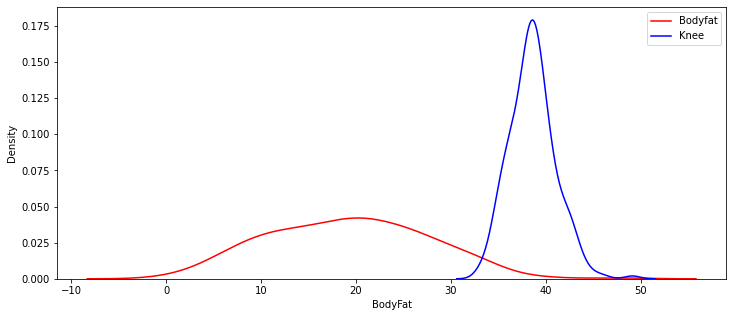

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature is shown below:


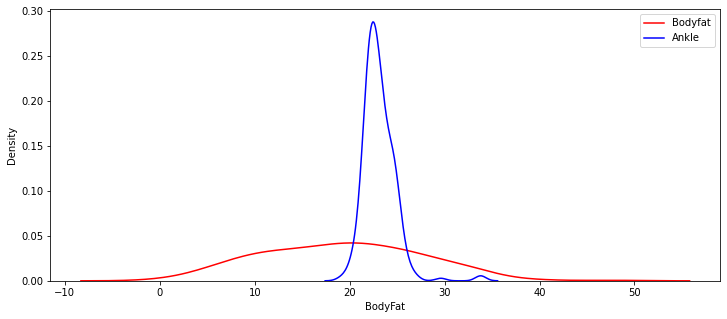

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is shown below:


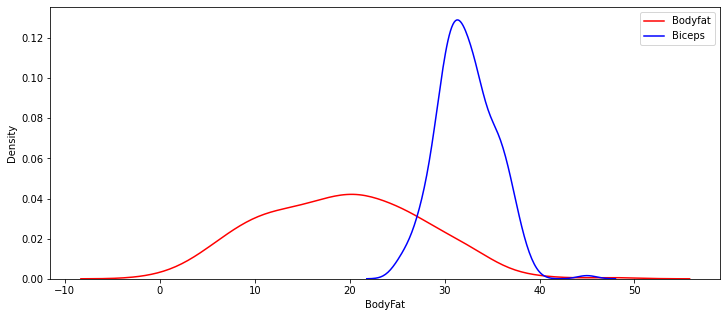

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature is shown below:


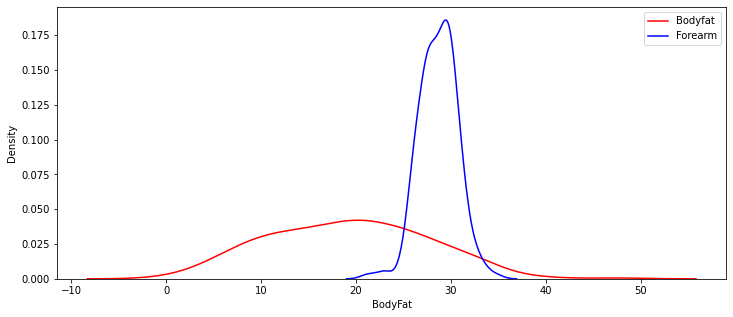

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature is shown below:


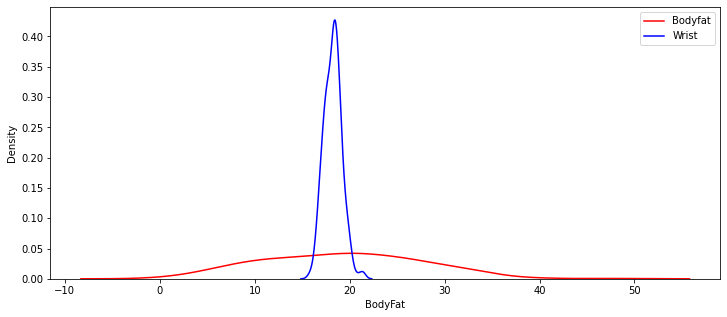

----------------------------------------------------------------------------------------------------


In [36]:
# checking the distribution of the dataset
def plotdistplots(col):
    plt.figure(figsize = (12,5))
    sns.kdeplot(df['BodyFat'],color='red',label='Bodyfat')
    sns.kdeplot(df[col],color = 'blue', label =col)
    plt.legend()
    plt.show()
    
cols= list(df.columns)
for i in cols:
    print(f'Distribution plots for {i} feature is shown below:')
    plotdistplots(i)
    print('-'*100)

In [37]:
import scipy.stats as stats

Distribution plots for the feature Density are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


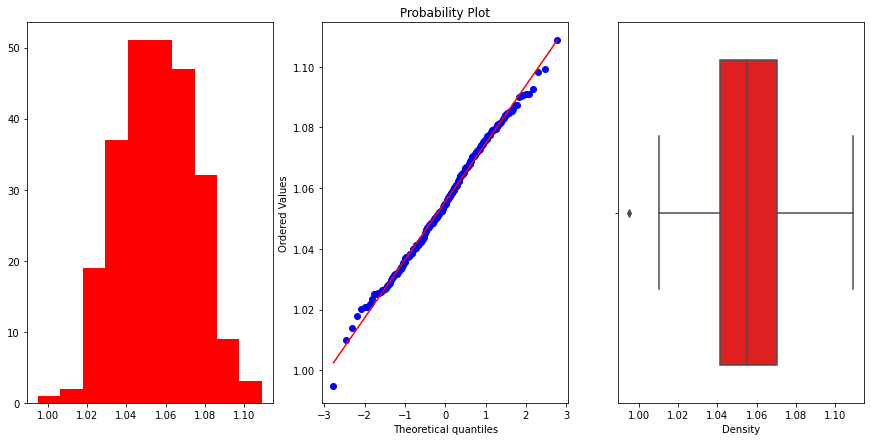

----------------------------------------------------------------------------------------------------
Distribution plots for the feature BodyFat are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


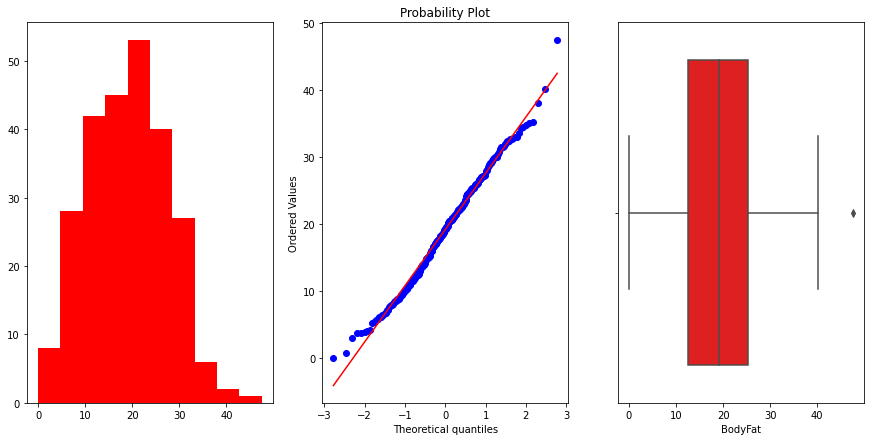

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Age are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


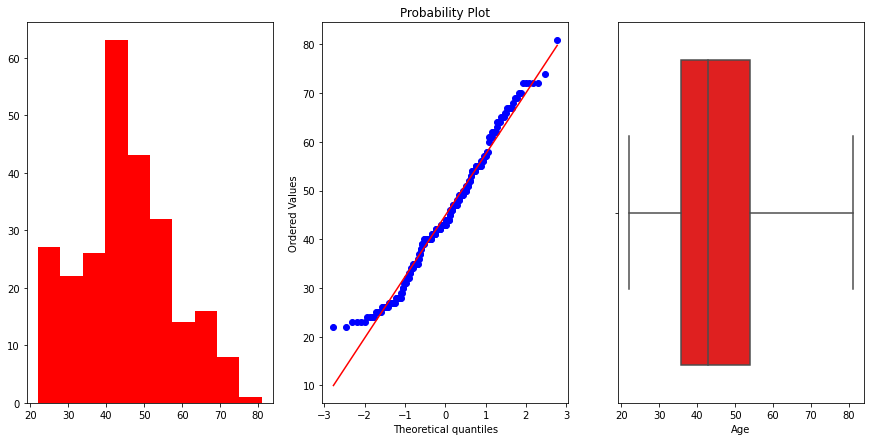

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Weight are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


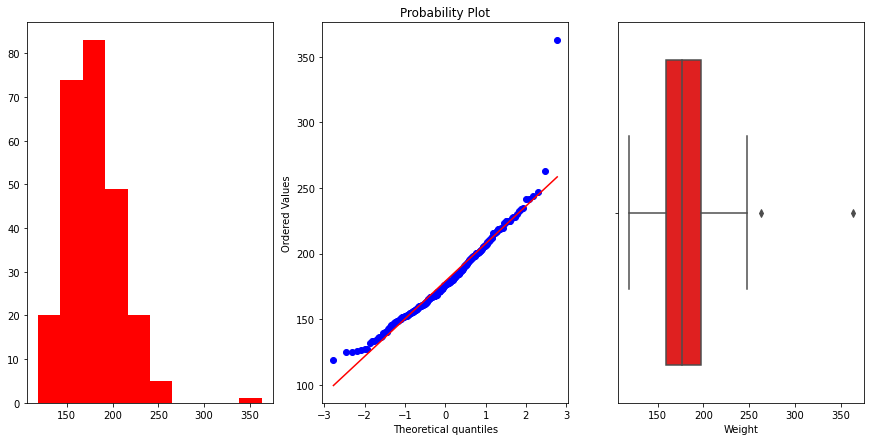

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Height are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


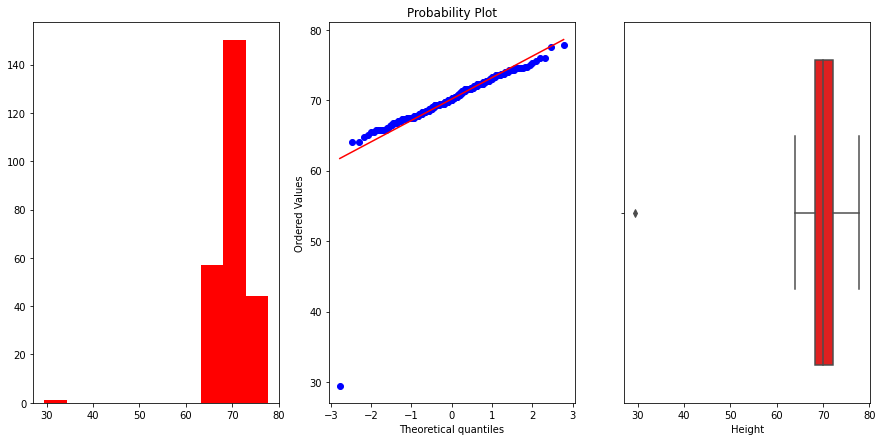

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Neck are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


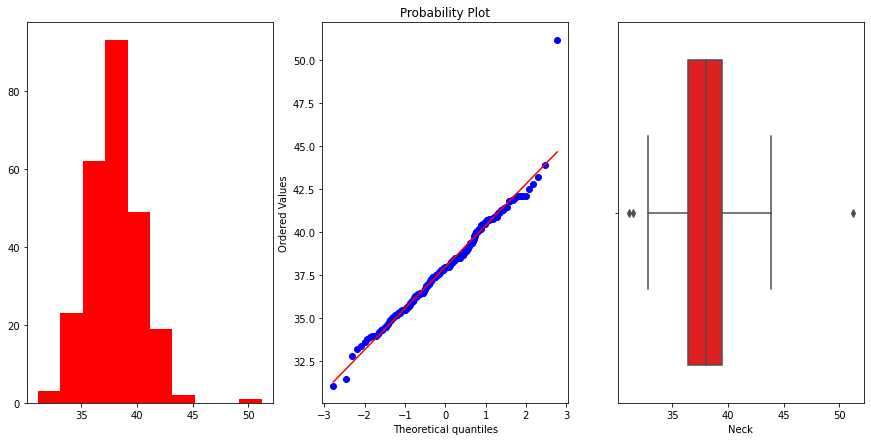

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Chest are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


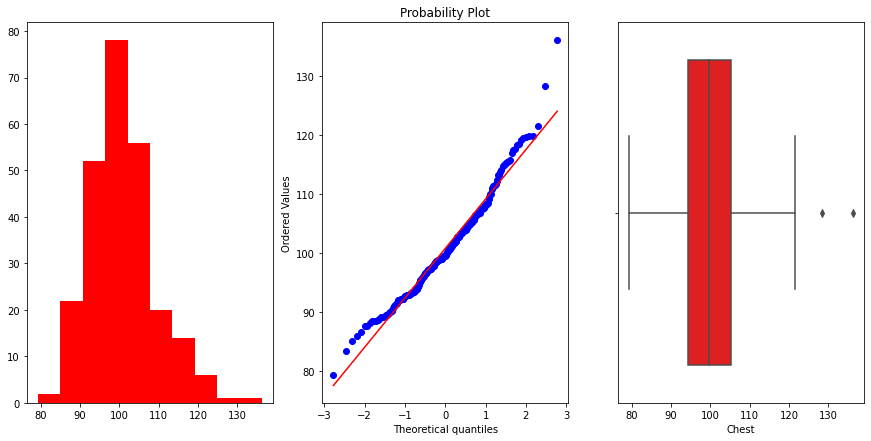

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Abdomen are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


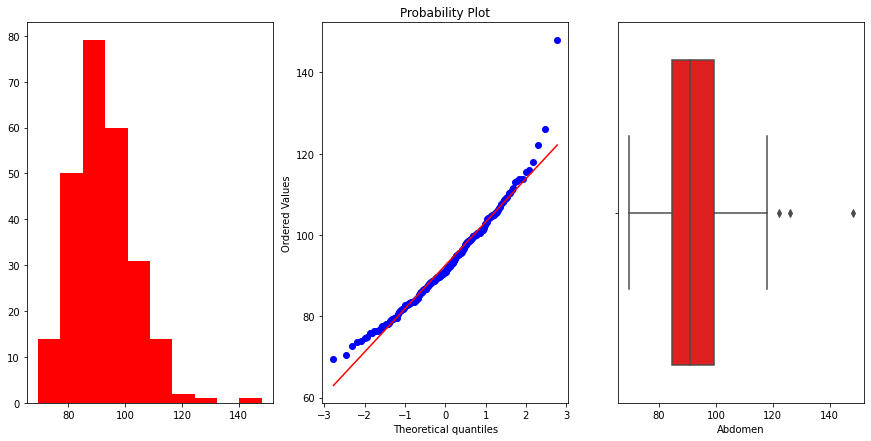

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Hip are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


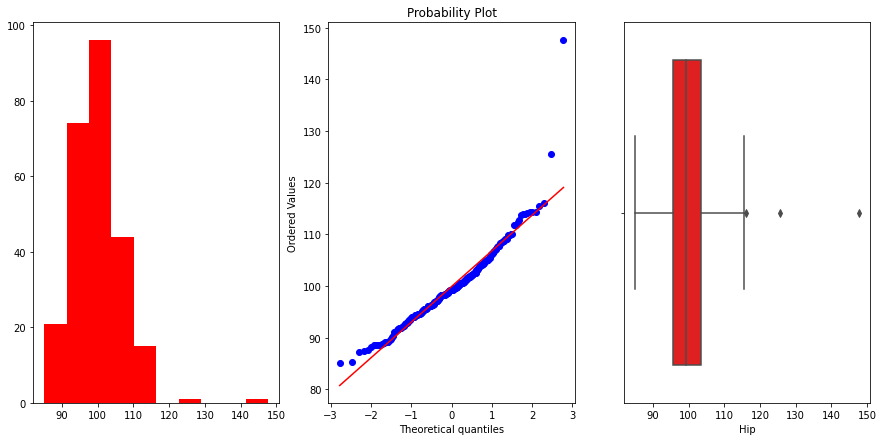

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Thigh are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


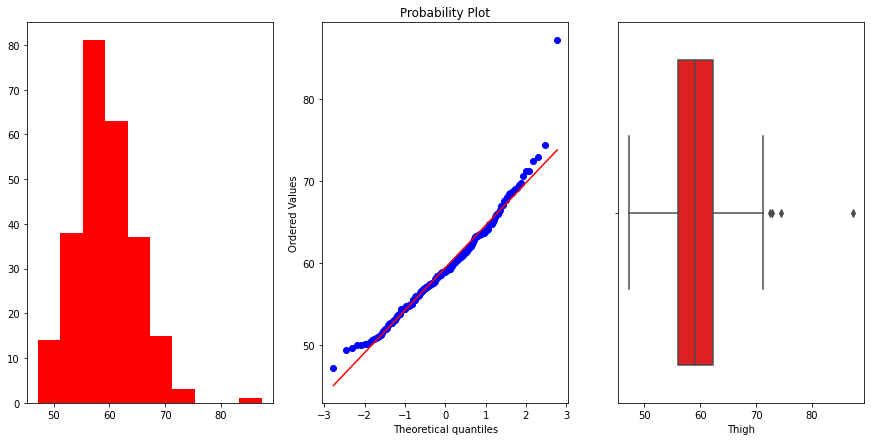

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Knee are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


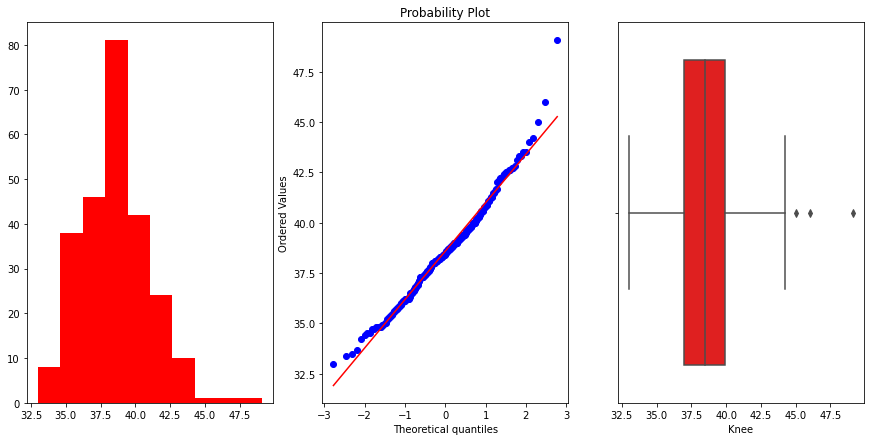

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Ankle are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


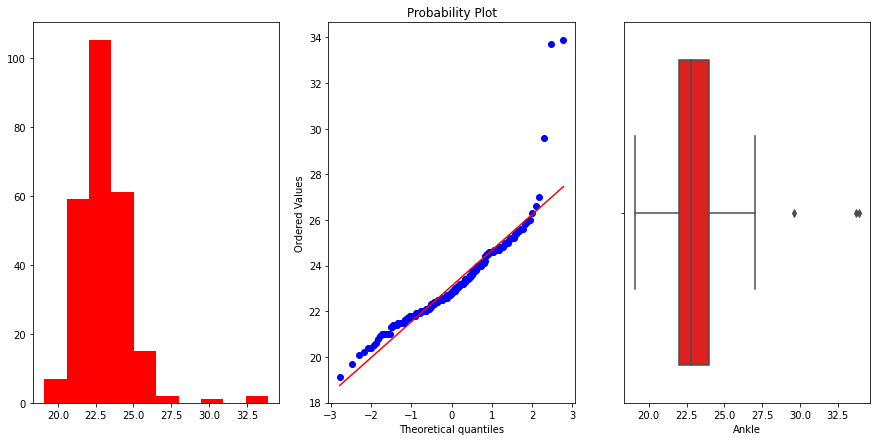

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Biceps are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


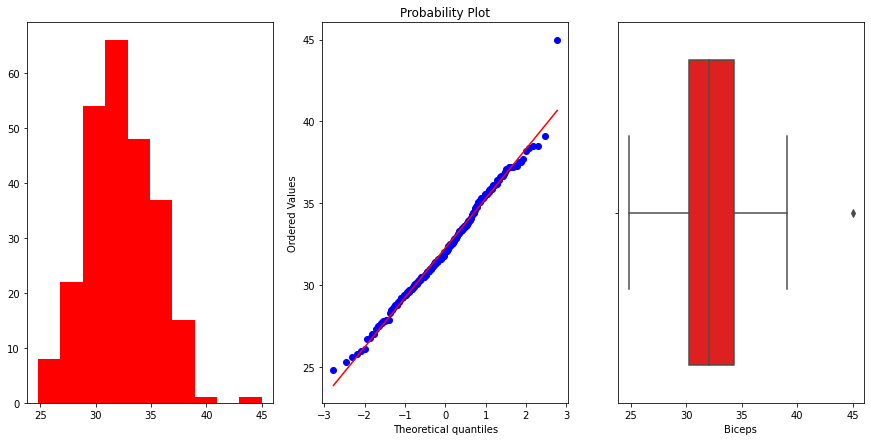

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Forearm are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


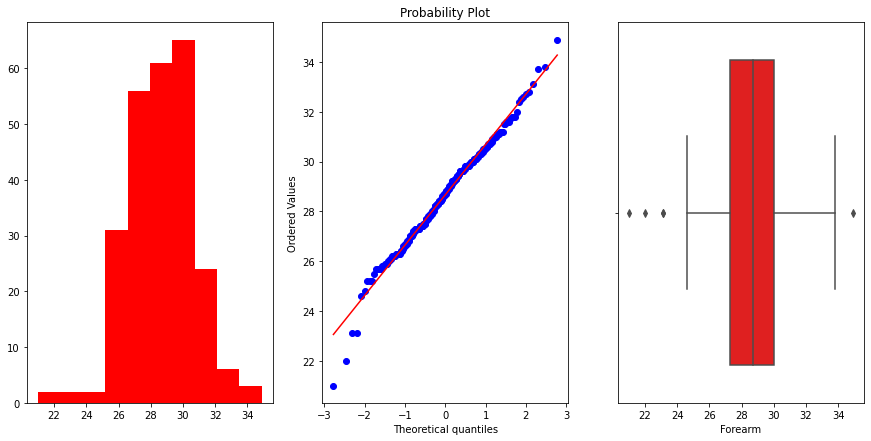

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Wrist are shown below:


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


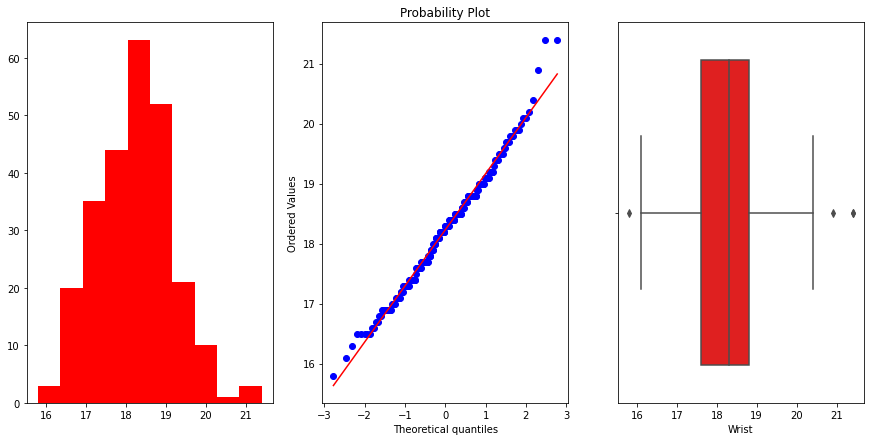

----------------------------------------------------------------------------------------------------


In [38]:
def drawplots(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='red')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color='red')
    
    plt.show()
    
cols = list(df.columns)
for i in range(len(cols)):
    print(f'Distribution plots for the feature {cols[i]} are shown below:')
    
    drawplots(df,cols[i])
    
    print('-'*100)
    

### Checking outliers

In [39]:
upperlimit = []
lowerlimit = []
for i in df.columns:
    upperlimit.append(df[i].mean()+(df[i].std())*4)
    lowerlimit.append(df[i].mean()+(df[i].std())*4)

In [40]:
cols = list(df.columns)
j = 0
for i in range(len(cols)):
    temp=df.loc[(df[cols[i]]>upperlimit[j])&(df[cols[i]]<lowerlimit[j])]
    j+=1
    
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


### Feature Selection with ExtraTrees Regressor

In [41]:
data = df.copy()
test = data['BodyFat']
train = data.drop(['BodyFat'],axis = 1)

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(train,test)

ExtraTreesRegressor()

In [43]:
er.feature_importances_

array([7.10903692e-01, 1.95414518e-03, 1.43990795e-02, 3.76699405e-03,
       6.70581885e-03, 5.37755229e-02, 1.60790013e-01, 1.86645220e-02,
       8.43797605e-03, 7.65538475e-03, 1.19161042e-03, 9.71510765e-03,
       6.10027835e-04, 1.43010612e-03])

<AxesSubplot:>

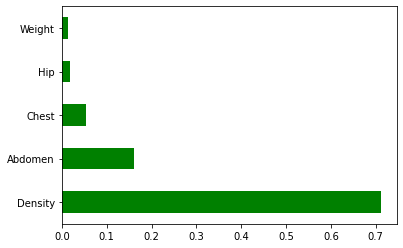

In [44]:
series = pd.Series(er.feature_importances_,index=train.columns)
series.nlargest(5).plot(kind='barh',color='green')

### XBoost for feature extraction

In [45]:
feature_names= train.columns
data_dmatrix = xgb.DMatrix(data=train,label=test,  feature_names=feature_names)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.5,'learning_rate': 0.01,
                'max_depth': 10, 'alpha': 10}

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=100)

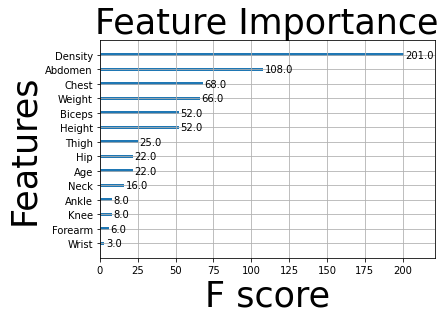

In [46]:
ax = xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 5]
ax.set_ylabel('Features', fontsize=35)
ax.set_xlabel('F score', fontsize=35)
ax.set_title('Feature Importance', fontsize=35)
plt.show()

C:\Users\busola\AppData\Local\Temp/ipykernel_41260/148817024.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Features correlation heat map', FontSize=15)


Text(0.5, 1.0, 'Features correlation heat map')

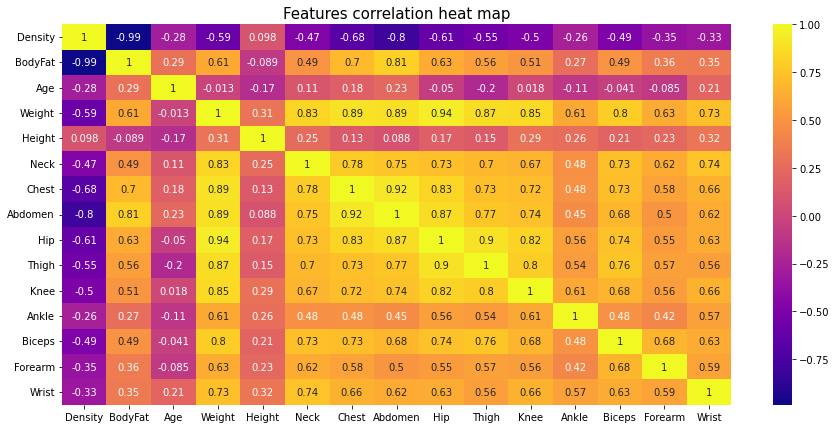

In [47]:
# Feature correlation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.title('Features correlation heat map', FontSize=15)

In [48]:
def correlation(df,threshold):
    colcorr = set()
    corrmat = df.corr()
    
    for i in range(len(corrmat)):
        for j in range(i):
            
            if abs(corrmat.iloc[i][j])>threshold:
                colname = corrmat.columns[i]
                colcorr.add(colname)
                
                
    return colcorr

corr_df = correlation(train,threshold=0.75)
corr_df

{'Abdomen', 'Biceps', 'Chest', 'Hip', 'Knee', 'Neck', 'Thigh'}

In [49]:
#Using variance inflation factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

temp=data[list(data.columns)]
info=pd.DataFrame()
info['VIF']=[variance_inflation_factor(temp.values,i) for i in range(temp.shape[1])]
info['column']=temp.columns
info

,VIF,column
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


### Understanding the features and their relevance in target prediction

###### Direction:
At this stage, we'll do away with features with F score less than 10 - Gender, Self_Employed, Education, & Dependents. *See the plot below*. Also, Coapplicant Income and Applicant Income will be droped while the Total Income is retained to avoid duplication.

In [50]:
#Selecting the consistent features with high importance
cols1 = list(series.nlargest(5).index)
cols1

['Density', 'Abdomen', 'Chest', 'Hip', 'Weight']

In [51]:
totrain = train[cols1]
totrain.head()

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25


In [52]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [53]:
# build train and validation datasets
X_train, X_test, y_train, y_test = train_test_split(totrain, test, test_size=0.2)
X_train.shape,X_test.shape

((201, 5), (51, 5))

[Text(0.49052526595744683, 0.9545454545454546, 'X[0] <= 1.056\nsquared_error = 65.869\nsamples = 201\nvalue = 19.172'),
 Text(0.19514627659574468, 0.8636363636363636, 'X[0] <= 1.036\nsquared_error = 20.731\nsamples = 103\nvalue = 25.713'),
 Text(0.05452127659574468, 0.7727272727272727, 'X[0] <= 1.022\nsquared_error = 7.323\nsamples = 30\nvalue = 31.613'),
 Text(0.01702127659574468, 0.6818181818181818, 'X[1] <= 114.8\nsquared_error = 5.332\nsamples = 4\nvalue = 36.925'),
 Text(0.00851063829787234, 0.5909090909090909, 'X[1] <= 113.4\nsquared_error = 1.0\nsamples = 2\nvalue = 39.1'),
 Text(0.00425531914893617, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 40.1'),
 Text(0.01276595744680851, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 38.1'),
 Text(0.02553191489361702, 0.5909090909090909, 'X[4] <= 295.7\nsquared_error = 0.202\nsamples = 2\nvalue = 34.75'),
 Text(0.02127659574468085, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 34.3'),
 Text(0.029787234042553193, 0.5, 'squared_error

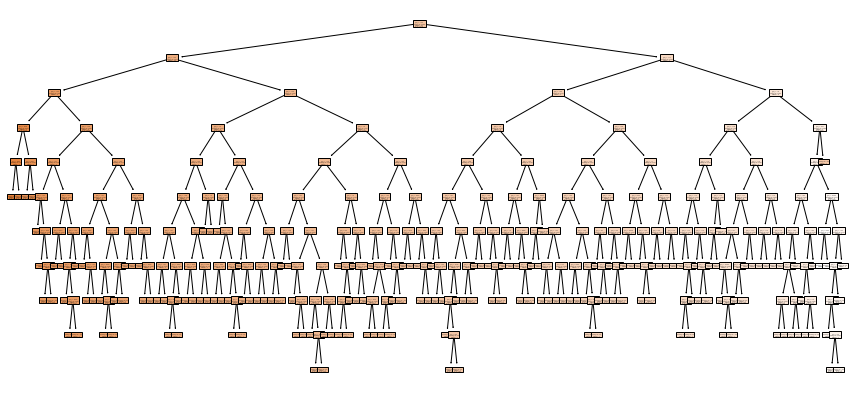

In [54]:
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(reg,filled=True)

In [55]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha=path.ccp_alphas

In [56]:
alphalist = []
for i in range(len(ccp_alpha)):
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    reg.fit(X_train,y_train)
    alphalist.append(reg)

In [57]:
alphalist[1:5]

[DecisionTreeRegressor(ccp_alpha=7.070076972737315e-17),
 DecisionTreeRegressor(ccp_alpha=2.828030789094926e-16),
 DecisionTreeRegressor(ccp_alpha=5.656061578189852e-16),
 DecisionTreeRegressor(ccp_alpha=5.656061578189852e-16)]

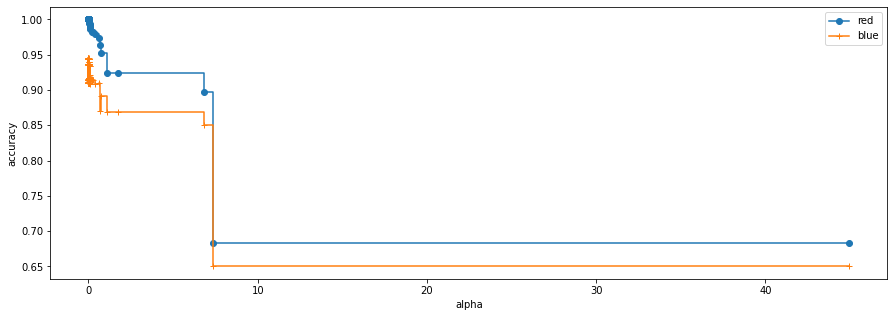

In [58]:
trainscore = [alphalist[i].score(X_train,y_train) for i in range(len(alphalist))]

testscore = [alphalist[i].score(X_test,y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,trainscore,marker = 'o',label = 'red', drawstyle = 'steps-post')
plt.plot(ccp_alpha,testscore,marker = '+',label = 'blue', drawstyle = 'steps-post')
plt.legend()
plt.show()

In [59]:
# Building models Without tunning
clf = DecisionTreeRegressor(ccp_alpha = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = metrics.r2_score(y_test,y_pred)
print(f'Decision Tree Approach: {score}')

rf = RandomForestRegressor(n_estimators=1000,ccp_alpha = 1)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
score_rf = metrics.r2_score(y_test,y_pred_rf)
print(f'Random Forest Approach: {score_rf}')

Decision Tree Approach: 0.8774671856162887
Random Forest Approach: 0.9130886249400647


### Using Hyperparameter Tuning

In [60]:
params = {
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(1,1200,40)],
            'criterion': ['mse','mae'],
            'max_depth': [int(x) for x in np.linspace(1,30,5)],
            'min_samples_split': [2,5,10,12],
            'min_samples_leaf': [2,5,10,12],
            'max_features': ['auto','sqrt'],
            'ccp_alpha': [1,2,2.5,3,3.5,4.5],
        }
    },
    
    'D-tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion': ['mse','mae'],
            'splitter': ['best','random'],
            'min_samples_split': [2,5,10,12],
            'min_samples_leaf': [2,5,10,12],
            'max_features': ['auto','sqrt'],
            'ccp_alpha': [1,2,2.5,3,3.5,4.5],
        }
    },
    
    'SVM':{
        'model': SVR(),
        'params':{
            'C': [0.25,0.50,0.75,1.0],
            'tol': [1e-10,1e-5,1e-4,0.025,0.75],
            'kernel': ['linear','poly','rbf','sigmoid'],
            'max_iter': [int(x) for x in np.linspace(1,250,20)],
        }
    },
}

In [70]:
scores=[]
for modelname, modelparam in params.items():
    clf = RandomizedSearchCV(modelparam['model'],param_distributions = modelparam['params'],
                            cv=5,n_jobs=-1,n_iter=10,scoring='neg_mean_squared_error')
    
    clf.fit(X_train,y_train)
    scores.append({
        'model_name': modelname,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_
    })

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [73]:
scoresdf = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scoresdf

,model_name,best_score,best_estimator
0,RandomForest,-4.544271,"(DecisionTreeRegressor(ccp_alpha=2, max_depth=..."
1,D-tree,-13.081557,"DecisionTreeRegressor(ccp_alpha=2, criterion='..."
2,SVM,-41.300563,"SVR(max_iter=223, tol=1e-10)"


In [75]:
rf = scoresdf['best_estimator'][0]
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
score_rf = metrics.r2_score(y_test,y_pred_rf)
print(f'Random Forest Approach: {score_rf}')

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Random Forest Approach: 0.8793659828177084


In [95]:
totrainlist = np.array(totrain)
predicted = []
for i in range(len(totrainlist)):
    predicted.append(rf.predict([totrainlist[i]]))
    
totrain['Actual Result'] = test
totrain['Predicted Result'] = np.array(predicted)
totrain

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\

,Density,Abdomen,Chest,Hip,Weight,Actual Result,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,12.3,12.594220
1,1.0853,83.0,93.6,98.7,173.25,6.1,7.177422
2,1.0414,87.9,95.8,99.2,154.00,25.3,25.274239
3,1.0751,86.4,101.8,101.2,184.75,10.4,9.816575
4,1.0340,100.0,97.3,101.9,184.25,28.7,29.947387
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0,10.199452
248,1.0236,105.0,108.5,104.5,201.00,33.6,31.948291
249,1.0328,111.5,111.1,101.7,186.75,29.3,30.529594
250,1.0399,101.3,108.3,97.8,190.75,26.0,25.482125


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[]

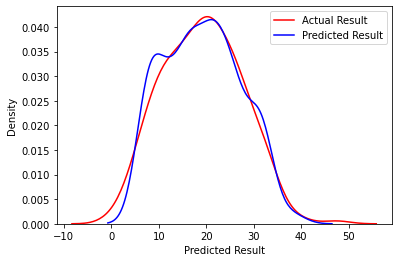

In [96]:
sns.distplot(totrain['Actual Result'],label='Actual Result',hist=False,color='red')
sns.distplot(totrain['Predicted Result'],label='Predicted Result',hist=False,color='blue')
plt.legend()
plt.plot()

In [99]:
# saving the model 
file = open('bodyfatmodel.pkl','wb')
pickle.dump(rf,file)
file.close()

### Introducing aadditional features and using standard scalar transform

In [77]:
newtrain = totrain.copy()
newtrain = newtrain.drop(columns =['Actual Result','Predicted Result'])
newtrain

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25
...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25
248,1.0236,105.0,108.5,104.5,201.00
249,1.0328,111.5,111.1,101.7,186.75
250,1.0399,101.3,108.3,97.8,190.75


In [78]:
# Introducing aadditional features and using standard scalar transform
newtrain['Bmi']=703*newtrain['Weight']/(df['Height']**2)
newtrain['CA_ratio'] = newtrain['Abdomen']/newtrain['Chest']
newtrain.head()

,Density,Abdomen,Chest,Hip,Weight,Bmi,CA_ratio
0,1.0708,85.2,93.1,94.5,154.25,23.624460,0.915145
1,1.0853,83.0,93.6,98.7,173.25,23.332048,0.886752
2,1.0414,87.9,95.8,99.2,154.00,24.666315,0.917537
3,1.0751,86.4,101.8,101.2,184.75,24.880784,0.848723
4,1.0340,100.0,97.3,101.9,184.25,25.514854,1.027749


In [79]:
# build train and validation datasets
X_train, X_test, y_train, y_test = train_test_split(newtrain, test, test_size=0.2)
print(f'The train shape: {X_train.shape} and the test shape: {X_test.shape}')

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

The train shape: (201, 7) and the test shape: (51, 7)


In [82]:
scores=[]
for modelname, modelparam in params.items():
    clf = RandomizedSearchCV(modelparam['model'],param_distributions = modelparam['params'],
                            cv=5,n_jobs=-1,n_iter=10,scoring='neg_mean_squared_error')
    
    clf.fit(X_train,y_train)
    scores.append({
        'model_name': modelname,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_
    })

C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=210).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [83]:
scoresdf = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scoresdf

,model_name,best_score,best_estimator
0,RandomForest,-5.524115,"(DecisionTreeRegressor(ccp_alpha=3, max_depth=..."
1,D-tree,-8.837391,"DecisionTreeRegressor(ccp_alpha=3.5, criterion..."
2,SVM,-1.762382,"SVR(C=0.5, kernel='linear', max_iter=210, tol=..."


In [84]:
sv = scoresdf['best_estimator'][2]
sv.fit(X_train,y_train)
y_pred_sv = sv.predict(X_test)
score_sv = metrics.r2_score(y_test,y_pred_sv)
print(f'SVM Approach: {score_sv}')

SVM Approach: 0.9796503917532532


C:\Users\busola\Desktop\771768\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=210).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [89]:
newtrainlist = np.array(sc.fit_transform(newtrain))
predicted = []
for i in range(len(newtrainlist)):
    predicted.append(sv.predict([newtrainlist[i]]))
    
newtrain['Actual Result'] = test
newtrain['Predicted Result'] = np.array(predicted)
newtrain

,Density,Abdomen,Chest,Hip,Weight,Bmi,CA_ratio,Actual Result,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,23.624460,0.915145,12.3,12.323349
1,1.0853,83.0,93.6,98.7,173.25,23.332048,0.886752,6.1,5.861327
2,1.0414,87.9,95.8,99.2,154.00,24.666315,0.917537,25.3,25.284373
3,1.0751,86.4,101.8,101.2,184.75,24.880784,0.848723,10.4,10.360743
4,1.0340,100.0,97.3,101.9,184.25,25.514854,1.027749,28.7,28.646279
...,...,...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,21.024226,0.937220,11.0,11.100983
248,1.0236,105.0,108.5,104.5,201.00,29.044437,0.967742,33.6,33.283882
249,1.0328,111.5,111.1,101.7,186.75,30.138946,1.003600,29.3,29.402042
250,1.0399,101.3,108.3,97.8,190.75,26.979981,0.935365,26.0,26.072294


C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[]

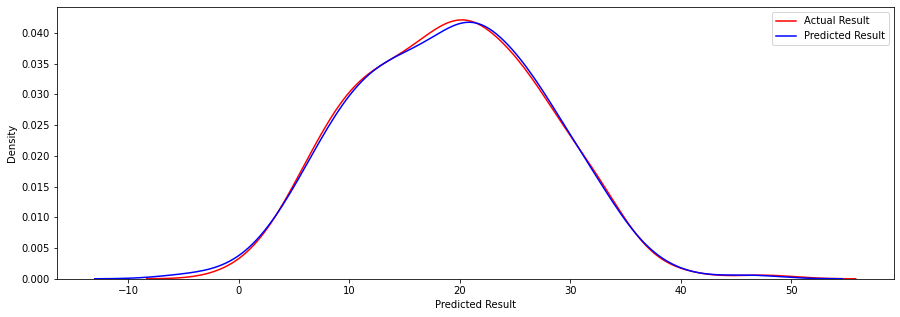

In [90]:
sns.distplot(newtrain['Actual Result'],label='Actual Result',hist=False,color='red')
sns.distplot(newtrain['Predicted Result'],label='Predicted Result',hist=False,color='blue')
plt.legend()
plt.plot()

In [91]:
# saving the model 
file = open('bodyfatmodel1.pkl','wb')
pickle.dump(rf,file)
file.close()

### Final Results:


| Models             	         | Accuracy                   |
|--------------------------------|----------------------------|
| Decision Tree without tuning:  | 0.88                       |
| Random Forest without tuning:  | 0.91                       |
| Random Forest with tunning (1):| 0.88                       |
| SVM Approach with tunning (2): | 0.98                       |



###### As observed, the SVM model with standard scalar transform gave a near accurate result